<a href="https://colab.research.google.com/github/martin10ca/Code_A_Chip_A51LCipher/blob/main/Code_A_Chip_A5_1LCipher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Universidad de Los Andes, November 2025
SPDX-License-Identifier: Apache-2.0
```

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Martín Daniel Calderón Acosta|Universidad de Los Andes|Yes|No|
|Juan Felipe Hernandez Saveedra|Universidad de Los Andes|Yes|No|
|Juan Diego Pinto|Universidad de Los Andes|Yes|Yes|

#Simetric Cipher Chip based on A5/1 Cipher Algorithm
The security of access, consumption, and distribution of information represents an ongoing area of research and development within the industry. Given the increasing sophistication of network security threats, encryption algorithms serve as the most effective tool to ensure that data remain secure—requiring continuous evolution to stay ahead of emerging attacks [1].

Information encryption follows the flow of data through a network as illustrated below: a plaintext message, referred to as “TEXT” passes through an encryption algorithm that uses a secret key, “KEY1” to transform the readable text into an unintelligible encrypted message, “CIPHER”. Once the “CIPHER” reaches the receiver, it is decrypted using a corresponding key “KEY2” recovering the original plaintext “TEXT" [1].




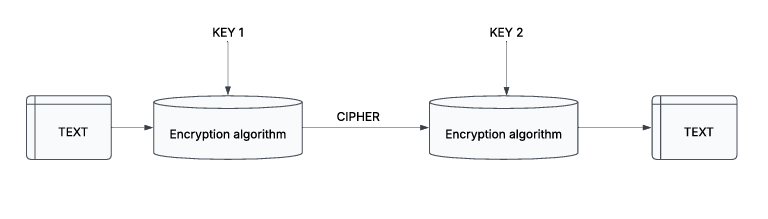

*Fig. 1 – General Encryption Model[1]*




Encryption algorithms can be classified according to various criteria.
See Fig. 2


*Fig 2 – Cipher Classification[1]*


For selecting an encryption algorithm that is relevant to current industrial applications, fast, and low in computational complexity, several categories are considered. The classification based on key usage distinguishes between symmetric and asymmetric algorithms. In symmetric algorithms, “KEY1” is identical to “KEY2” while in asymmetric algorithms the two keys differ. Symmetric algorithms are preferred for their simplicity, efficient resource usage, and fast encryption speed, as the same key is used for both encryption and decryption [1]. This leads to smaller chip area and lower energy consumption. Regarding data processing, encryption can be carried out in either block or stream mode—the latter offering the advantage of using a different key bit for each encrypted bit, as well as a simpler structure [1].

For these reasons, a symmetric stream-based encryption algorithm is proposed for plaintext encryption. Symmetric encryption algorithms are mainly built upon substitution (predefined bit-value replacement), permutation (predetermined bit-order rearrangement), XOR logic operations (combining plaintext and key bits), and shift registers (used to reorder bits through feedback) [1]. Stream-type symmetric algorithms particularly rely on XOR operations and shift registers, both of which are discussed in detail below [1].


A natural question arises: Why XOR gates rather than other logical operators? The answer lies in a key mathematical property of XOR operations:
A ⊕ B ⊕ B = A.
If we consider A as the plaintext and B as the key, this property ensures that applying the same key twice allows the message to be decrypted—an essential feature in symmetric cryptography. Additionally, feedback-based shift registers enable the introduction of new bits into the most significant bit (MSB) position while shifting existing bits, effectively transforming a sequence from
MSB, MSB-1, …, LSB+1, LSB → F_BIT, MSB-1, …, LSB+1.
This process enhances diffusion and helps maintain the security and randomness of the encrypted message [1].

---
#A5/1 Cipher Overview
Nowadays, there exist several symmetric stream cipher algorithms such as RC4, Salsa20, and A5/1, among others. This notebook presents a lightweight version of the A5/1 cipher algorithm, chosen for its simplicity and its use of two fundamental cryptographic components: exclusive OR (XOR) operations and Linear Feedback Shift Registers (LFSRs).

The general behavior of the algorithm is illustrated in Fig. 3.



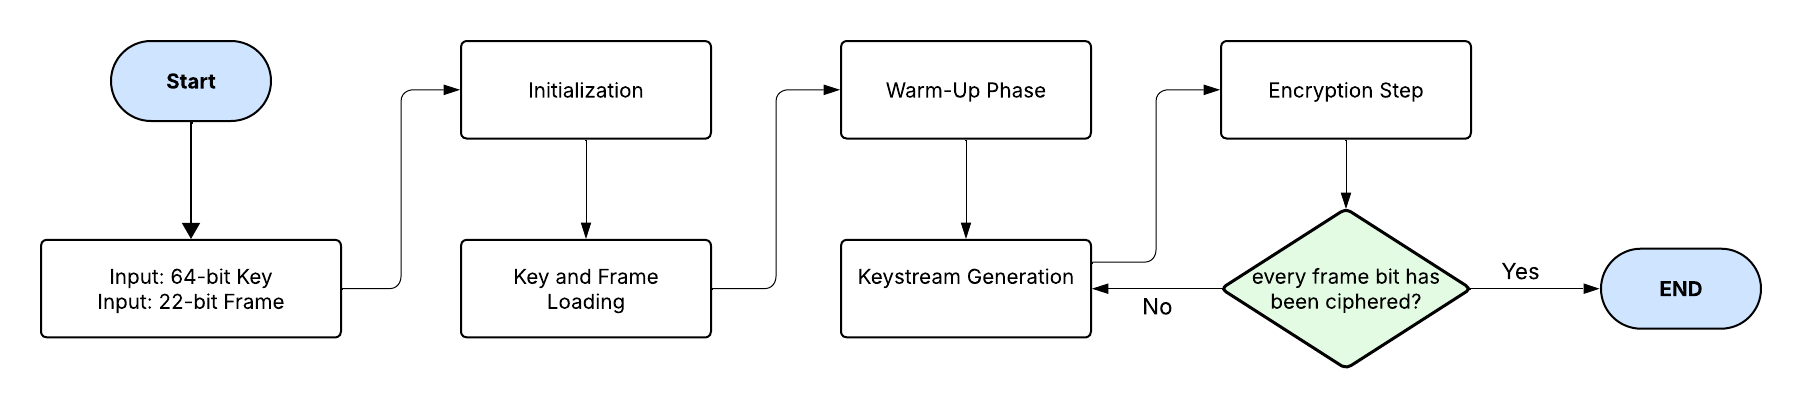

*Fig. 3 – A5/1 Cipher Algorithm Flow Chart [1]*

The main stages of the A5/1 algorithm are summarized as follows:

1. Initialization – Definition of Taps and Control Bits

- The term tap refers to the specific bit positions used to compute the feedback bit (F_BIT), which is inserted into the LFSR at each new clock cycle.
For example, in register R2, the feedback bit is calculated as:
F_Bit = R2[20]⊕R2[21].

- The control bit identifies a specific position within each register that is later used during the majority voting phase to determine which LFSRs are clocked.

2. Key and Frame Loading (64-bit Key, 22-bit Frame)

- During initialization, each bit of the key is XORed with the least significant bit (LSB) of each LFSR (R1, R2, R3).

- The resulting XOR output becomes the new feedback bit (F_BIT) for that register, effectively randomizing the internal state of all three LFSRs.

- The same process is repeated for the 22-bit frame number.

3. Warm-Up Phase

- Across 100 clock cycles, the algorithm computes the majority bit from the three control bits of R1, R2, and R3.

- Only the registers whose control bit matches the majority value are shifted in that cycle.

- This step ensures further diffusion and internal randomization before keystream generation begins.

4. Keystream Generation

For each output bit, the cipher repeats one cycle of the warm-up process:

- Compute the majority of the control bits.

- Clock only the registers that match the majority value.

- Compute the keystream bit (Z) as the XOR of the MSB bits from R1, R2, and R3:
Z= R[18]⊕R2[21]⊕R3[22]

5. Encryption Step
- The ciphertext bit (Ci) is obtained by XORing the keystream bit (Zi) with the corresponding plaintext bit (Ti): Ci=Ti⊕Zi

6. Output
- The result is a bitstream of encrypted data (C), which can later be decrypted by applying the same keystream and XOR operation.

# Simplified Educational Implementation
In addition, for clarity and educational purposes, this simplified implementation focuses on demonstrating the role of XOR gates and shift registers in the encryption process. The following design choices were made to reduce complexity while maintaining the essential behavior of a stream cipher:
1. Initialization
- Both the plaintext (t7 t6 … t0) and the key (k7 k6 … k0) are defined as 8-bit words.
* Three LFSRs are used, initialized as follows: LFSR1 = (k2, k1, k0), LFSR2 = (k5, k4, k3, k2),LFSR3 = (k7, k6, k5, k4, k3)
2. Key and Frame Loading
- Omitted for simplicity.
3. Warm-Up Phase
- Omitted for simplicity.
4. Keystream Generation
- The keystream bit (Z) for each cycle is computed as: Z= LSFR1[0]⊕LSFR2[0]⊕LSFR3[0]
5. Encryption Step
- The ciphertext bit (Ci) is obtained by XORing the keystream bit (Zi) with the corresponding plaintext bit (Ti): Ci=Ti⊕Zi

6. Output
- The result is a bitstream of encrypted data (C).

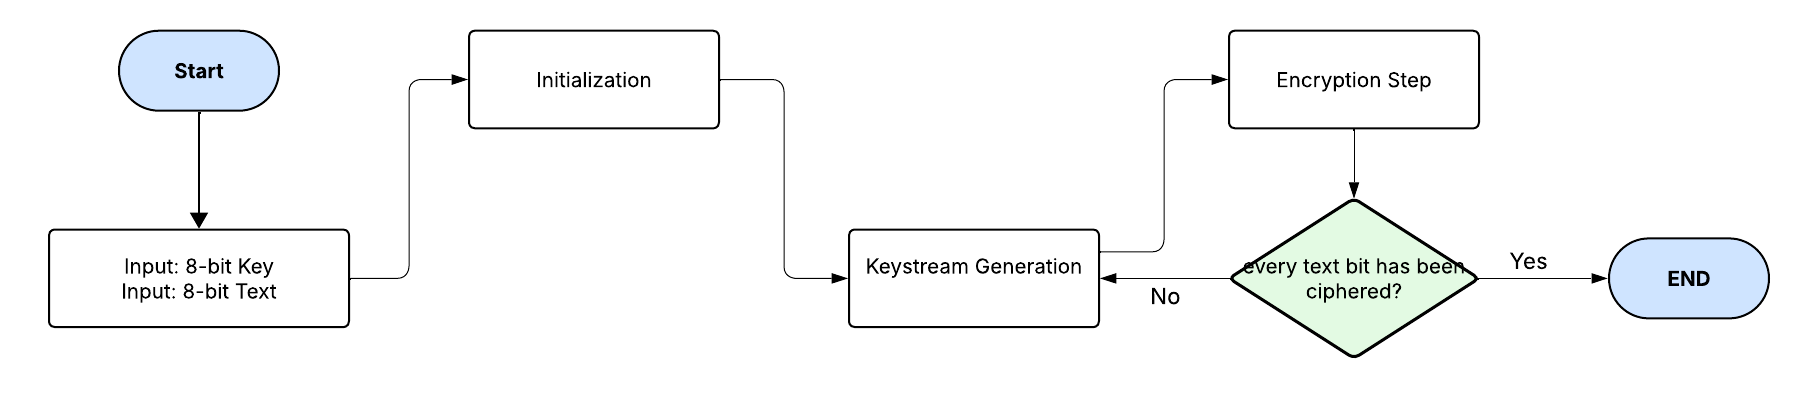

*Fig. 4 – Simplified A5/1 Cipher Algorithm Flow Chart [1]*

## Lightweight A5/1 Cipher Algorithm: Inputs and Outputs

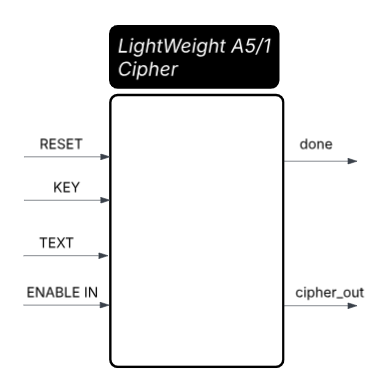


*Fig. 5 – LightWeight A5/1 Cipher Algorithm Black Box diagram [1]*


Inputs: Reset, Key, Text, Enable In

Outputs: Done, Cipher Out


## Lightweight A5/1 Cipher Algorithm: White Box

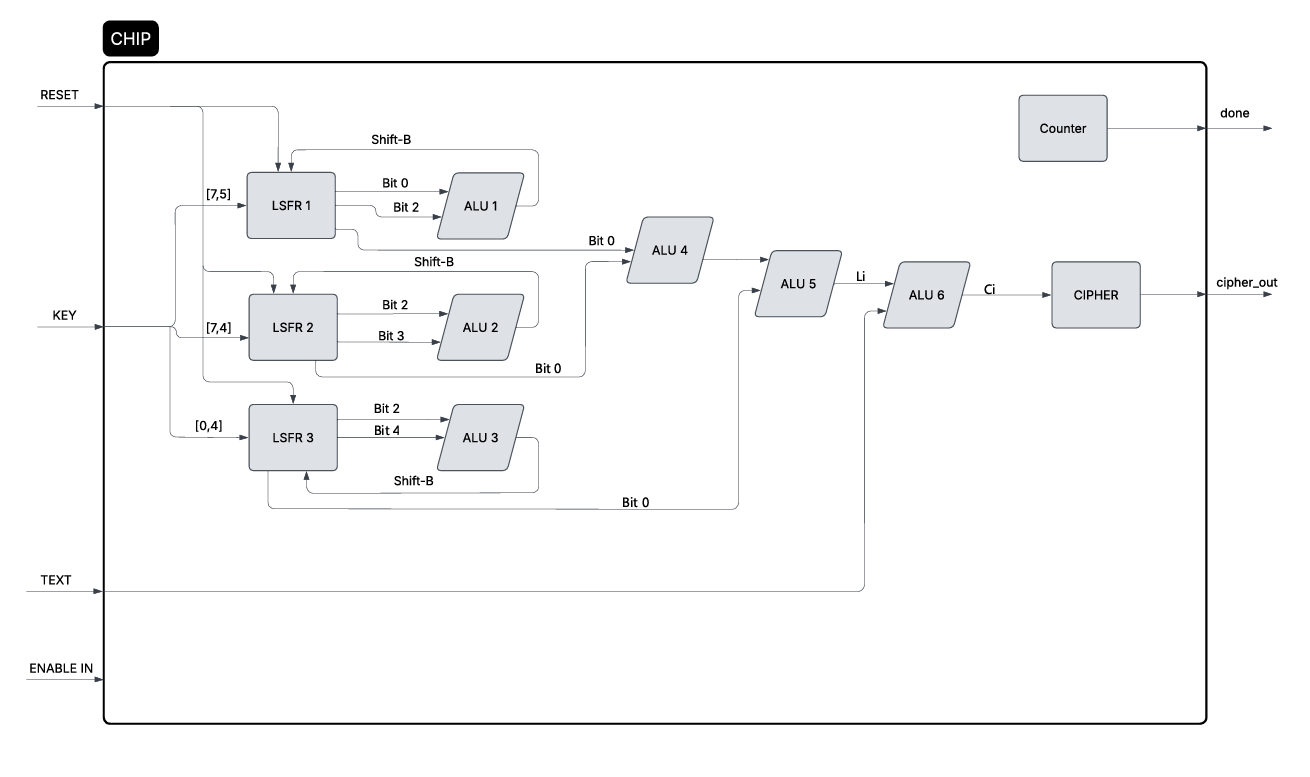


*Fig. 6 – LightWeight A5/1 Cipher Algorithm White Box diagram [1]*

## Lightweight A5/1 Cipher Algorithm: Classes

- ShiftRegister
- Alu
- Finite State Machine

## Lightweight A5/1 Cipher Algorithm: Code and Simulation

In [ ]:
#Code

## Lightweight A5/1 Cipher Algorithm: Conclusions

#References
[1] S. A. Qassir, M. T. Gaata, and A. T. . Sadiq, “Modern and Lightweight Component-based Symmetric Cipher Algorithms: A Review”, ARO, vol. 10, no. 2, pp. 152–168, Dec. 2022.